In [1]:
import class_function as cf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/result_6.csv')
X = data.drop(columns=['TARGET'])
Y = data.TARGET

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_cla = xgb.XGBClassifier(max_depth=10, n_estimators=100, random_state=0)

#模型训练
xg_cla.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [4]:
binary_proba =  xg_cla.predict_proba(x_test)
proba_list = []
for i in range(len(binary_proba)):
    proba_list.append(binary_proba[i][1])
    
threshold_list = np.arange(0, 1, 0.01)
accuracy_list = []
recall_list = []
precision_list = []
MissingAlarm_list = []
FalseAlarm_list = []
F1_list = []
fpr_list = []

for threshold in threshold_list:
    #y_predicted = multi_xgb.predict(x_test, threshold)
    y_predicted = []
    
    for proba in proba_list:
        if proba > threshold:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
            
    fbc = cf.For_binary_classifier(y_predicted, y_test)
    accuracy_list.append(fbc.accuracy)
    recall_list.append(fbc.recall)
    precision_list.append(fbc.precision)
    MissingAlarm_list.append(fbc.MissingAlarm)
    FalseAlarm_list.append(fbc.FalseAlarm)
    F1_list.append(fbc.F1)
    fpr_list.append(fbc.fpr)
    print('*' * 40)
    

                    Real +          Real -     
   Predict +         7420            84834     
   Predict -           0               0       

准确率： 0.08043011685130184
召回率： 1.0
精准率： 0.08043011685130184

漏警率： 0.0
虚警率： 0.9195698831486981
F1: 0.14888536629411886
fpr: 1.0
****************************************
                    Real +          Real -     
   Predict +         7375            81343     
   Predict -          45             3491      

准确率： 0.11778351074208164
召回率： 0.9939353099730458
精准率： 0.08312856466556956

漏警率： 0.0060646900269542
虚警率： 0.9168714353344305
F1: 0.15342528448688342
fpr: 0.9588490463729166
****************************************
                    Real +          Real -     
   Predict +         7157            70515     
   Predict -          263            14319     

准确率： 0.23279207405640948
召回率： 0.9645552560646901
精准率： 0.0921438871150479

漏警率： 0.03544474393530994
虚警率： 0.907856112884952
F1: 0.16821792882997227
fpr: 0.8312115425419053
****************

                    Real +          Real -     
   Predict +         1358            3120      
   Predict -         6062            81714     

准确率： 0.9004704403061113
召回率： 0.1830188679245283
精准率： 0.3032603841000447

漏警率： 0.8169811320754717
虚警率： 0.6967396158999553
F1: 0.22827365943856107
fpr: 0.036777707051418064
****************************************
                    Real +          Real -     
   Predict +         1265            2783      
   Predict -         6155            82051     

准确率： 0.9031153120731893
召回率： 0.17048517520215634
精准率： 0.3125

漏警率： 0.8295148247978437
虚警率： 0.6875
F1: 0.22061388210673177
fpr: 0.03280524318080015
****************************************
                    Real +          Real -     
   Predict +         1161            2486      
   Predict -         6259            82348     

准确率： 0.9052073622823943
召回率： 0.1564690026954178
精准率： 0.3183438442555525

漏警率： 0.8435309973045821
虚警率： 0.6816561557444475
F1: 0.20981295744104095
fpr: 0.0293042883749

                    Real +          Real -     
   Predict +          223             244      
   Predict -         7197            84590     

准确率： 0.9193422507425152
召回率： 0.030053908355795148
精准率： 0.47751605995717344

漏警率： 0.9699460916442049
虚警率： 0.5224839400428265
F1: 0.056548751109420564
fpr: 0.002876205295046797
****************************************
                    Real +          Real -     
   Predict +          202             221      
   Predict -         7218            84613     

准确率： 0.9193639300192945
召回率： 0.027223719676549865
精准率： 0.47754137115839246

漏警率： 0.9727762803234501
虚警率： 0.5224586288416075
F1: 0.05151090144077521
fpr: 0.0026050875828087794
****************************************
                    Real +          Real -     
   Predict +          187             198      
   Predict -         7233            84636     

准确率： 0.9194506471264119
召回率： 0.025202156334231805
精准率： 0.4857142857142857

漏警率： 0.9747978436657682
虚警率： 0.5142857142857142
F1: 0.0479

                    Real +          Real -     
   Predict +          20              10       
   Predict -         7400            84824     

准确率： 0.9196782795325948
召回率： 0.0026954177897574125
精准率： 0.6666666666666666

漏警率： 0.9973045822102425
虚警率： 0.33333333333333337
F1: 0.005369127516778524
fpr: 0.00011787726619044251
****************************************
                    Real +          Real -     
   Predict +          16               9       
   Predict -         7404            84825     

准确率： 0.9196457606174258
召回率： 0.00215633423180593
精准率： 0.64

漏警率： 0.997843665768194
虚警率： 0.36
F1: 0.0042981867024848896
fpr: 0.00010608953957139826
****************************************
                    Real +          Real -     
   Predict +          15               7       
   Predict -         7405            84827     

准确率： 0.9196566002558154
召回率： 0.0020215633423180594
精准率： 0.6818181818181818

漏警率： 0.9979784366576819
虚警率： 0.31818181818181823
F1: 0.00403117441547971
fpr: 8.25

                    Real +          Real -     
   Predict +           0               0       
   Predict -         7420            84834     

准确率： 0.9195698831486981
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7420            84834     

准确率： 0.9195698831486981
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7420            84834     

准确率： 0.9195698831486981
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         7420            84834     

准确率： 0.9195698831486981
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
*********

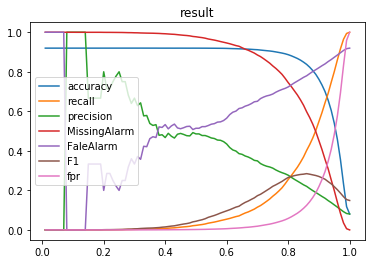

In [5]:
x_list = 1 - np.arange(0, 1, 0.01)
plt.title('result')
plt.plot(x_list, accuracy_list, label='accuracy')
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.plot(x_list, MissingAlarm_list, label='MissingAlarm')
plt.plot(x_list, FalseAlarm_list, label='FaleAlarm')
plt.plot(x_list, F1_list, label='F1')
plt.plot(x_list, fpr_list, label='fpr')
plt.legend()
plt.show()

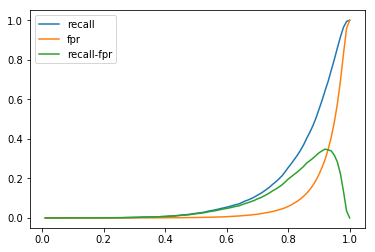

In [6]:
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, fpr_list, label='fpr')
plt.plot(x_list, [recall_list[i] - fpr_list[i] for i in range(len(recall_list))], label='recall-fpr')
plt.legend()
plt.show()

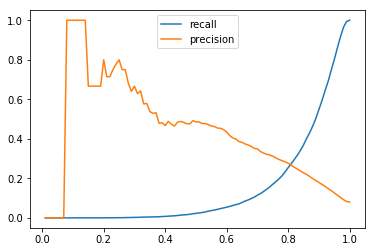

In [7]:
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.legend()
plt.show()

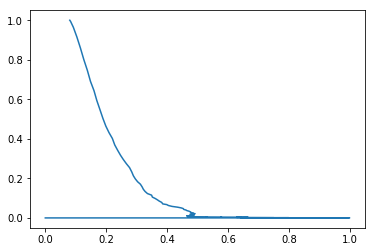

In [8]:
plt.plot(precision_list, recall_list, label='precision')
plt.show()

In [9]:
tpr_min_fpr = [recall_list[i] - fpr_list[i] for i in range(len(recall_list))]
ks = max(tpr_min_fpr)
ks

0.34813567412801166